<a href="https://colab.research.google.com/github/MercadoMR/AITraining/blob/main/Ejemplo_m%C3%A1quina_de_soporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

Text(0, 0.5, 'Viento')

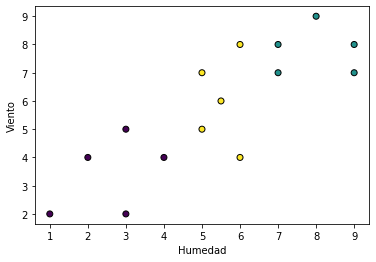

In [ ]:
# Ejercicio Realizar un modelo de clasificación de máquina de soporte
# vectorial (3 categorías en 2 dimensiones) para los siguientes datos y ejemplos
# que representan si un día se clasifica como tormentoso, nublado o soleado
# dependiendo de su parámetros de Humedad y Viento medidos del 1 al 10

# Las salidas deseadas están dadas por:
# 0 = Tormenta
# 1 = Día nublado
# 2 = Día Soleado

Caract = np.array([[1, 2], [3, 2], [4, 4], [3, 5], [2, 4], [8, 9], [9, 7], [7, 7], [9, 8], [7, 8], [5, 5], [5.5, 6], [5, 7], [6, 4], [6, 8]])
Clima = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]

# Mostramos gráficamente la ubicación de las frutas:
plt.scatter(Caract[:, 0], Caract[:, 1], edgecolor='k', c=Clima)
plt.xlabel("Humedad")
plt.ylabel("Viento")

In [ ]:
# Uso de la máquina de soporte vectorial:
from sklearn import svm

svm_clasif = svm.SVC(kernel='linear', C=1)
svm_clasif.fit(Caract, Clima)

print("Acc entrenamiento: {:.3f} %".format(svm_clasif.score(Caract, Clima)*100))

Acc entrenamiento: 100.000 %


Text(0.5, 0, 'Color')

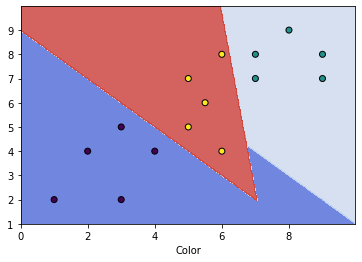

In [ ]:
# Graficamos de nuevo con los parámetros obtenidos del clasificador

# Generamos una reja de graficado
x_min, x_max = Caract[:, 0].min() - 1, Caract[:, 0].max() + 1
y_min, y_max = Caract[:, 1].min() - 1, Caract[:, 1].max() + 1
h = .02  # Paso de la gráfica 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Ploteamos las fornteras de decisión
# Ravel regresa un arreglo continuo suavizado de valores
Z = svm_clasif.predict(np.c_[xx.ravel(), yy.ravel()])

# Agregamos colores a la gráfica
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Graficamos los ejemplos originales
plt.scatter(Caract[:, 0], Caract[:, 1], edgecolor='k', c=Clima)
plt.xlabel("Redondez")
plt.xlabel("Color")

[2]
La clase es Soleado


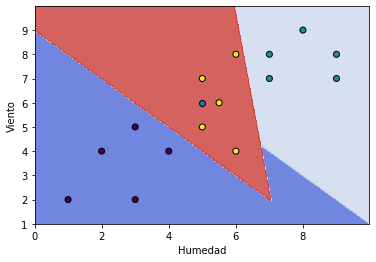

In [ ]:
# Podemos realizar una nueva predicción de valores que antes no estaban en el entrenamiento
# y predicir si se tratará de una nubleado, soleado o tormenta:
Humedad = 5
Viento = 6
Clase = svm_clasif.predict(np.array([[Humedad, Viento]]))

print(Clase)

if Clase == 0:
  print("La clase es Tormenta")
elif Clase == 1:
  print("La clase es Nubleado")
else:
  print("La clase es Soleado")

# Ploteamos el nuevo ejemplo

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Graficamos los ejemplos originales
plt.scatter(Caract[:, 0], Caract[:, 1], edgecolor='k', c=Clima)
plt.xlabel("Humedad")
plt.ylabel("Viento")

plt.scatter(Humedad, Viento, edgecolor='k')